In [1]:
# !pip install gymnasium
# !pip install matplotlib
# !pip install torch
import gymnasium as gym
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

Let's determing following blocks:

- Hyperparameters
- Environment
- Policy

Task:
implement act function in policy. It should return deterministic action value.

In [2]:
# --- Hyperparameters ---
class cfg:
    env_name = "CartPole-v1"
    learning_rate = 1e-2
    gamma = 0.99
    hid_dim = 128
    episodes = 700


# --- Create environment ---
# env = gym.make('CartPole-v1',render_mode="human")
env = gym.make(cfg.env_name)


# --- Policy network ---
class PolicyNet(nn.Module):
    def __init__(self, obs_dim, n_actions, hid_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(obs_dim, hid_dim),
            nn.ReLU(),
            nn.Linear(hid_dim, n_actions),
            nn.Softmax(dim=-1),
        )

    def forward(self, x):
        probs = self.net(x)
        dist = torch.distributions.Categorical(probs)
        action = dist.sample()
        log_prob = dist.log_prob(action)
        return action, log_prob

    def act(self, x):
        """
        take state as input
        return deterministic action value in torch dtype
        """
        ## TODO Implement
        pass


policy = PolicyNet(env.observation_space.shape[0], env.action_space.n, cfg.hid_dim)
optimizer = optim.Adam(policy.parameters(), lr=cfg.learning_rate)

# Task2
The task is simple: make it works better.
This procedure works. But we could make it even better!!

Follow the following steps to improve performance:
- implement compute_reward_to_go function
- decrease varince by sustraction bias from rewards (simple mean(reawards) is enough)
- instead of one trajectory sampling sample multiple trajectoris

In [3]:
# --- Function to compute reward-to-go ---
def compute_reward_to_go(rewards, gamma):
    pass


# --- Training loop ---
reward_hist = []
for episode in range(cfg.episodes):
    state, _ = env.reset()
    log_probs = []
    rewards = []

    while True:
        state_tensor = torch.from_numpy(state).float()
        action, log_prob = policy(state_tensor)
        state, reward, done, truncated, _ = env.step(action.item())

        log_probs.append(log_prob)
        rewards.append(reward)
        if done or truncated:
            break

    # Compute reward-to-go and normalize
    # TODO uncomment and use reward_to_go
    # rtg = compute_reward_to_go(rewards, cfg.gamma)
    # TODO normalize reward_to_go with mean reward, devide by std

    # Compute loss and update policy
    loss = 0
    for log_prob, Gt in zip(log_probs, rewards):
        loss -= log_prob * Gt

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Logging
    total_reward = sum(rewards)
    reward_hist.append(total_reward)
    if episode % 10 == 0:
        print(f"Episode {episode}, total reward: {total_reward}")

env.close()

Episode 0, total reward: 27.0
Episode 10, total reward: 100.0
Episode 20, total reward: 35.0
Episode 30, total reward: 20.0
Episode 40, total reward: 26.0
Episode 50, total reward: 13.0
Episode 60, total reward: 10.0
Episode 70, total reward: 12.0
Episode 80, total reward: 15.0
Episode 90, total reward: 10.0
Episode 100, total reward: 10.0
Episode 110, total reward: 11.0
Episode 120, total reward: 18.0
Episode 130, total reward: 22.0
Episode 140, total reward: 21.0
Episode 150, total reward: 61.0
Episode 160, total reward: 21.0
Episode 170, total reward: 19.0
Episode 180, total reward: 14.0
Episode 190, total reward: 19.0
Episode 200, total reward: 11.0
Episode 210, total reward: 19.0
Episode 220, total reward: 14.0
Episode 230, total reward: 8.0
Episode 240, total reward: 9.0
Episode 250, total reward: 9.0
Episode 260, total reward: 15.0
Episode 270, total reward: 9.0
Episode 280, total reward: 9.0
Episode 290, total reward: 10.0
Episode 300, total reward: 10.0
Episode 310, total rewa

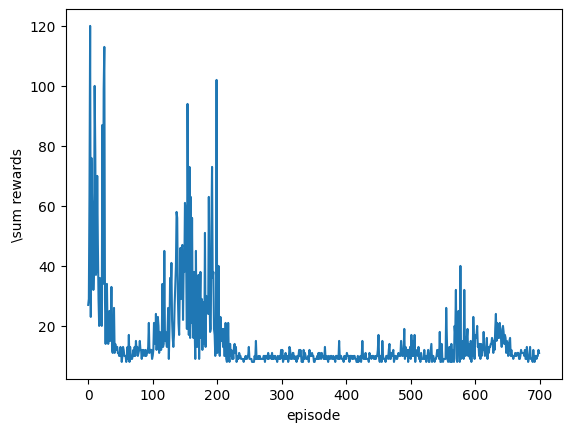

In [4]:
plt.plot(reward_hist)
plt.ylabel("\sum rewards")
plt.xlabel("episode")
plt.show()

In [5]:
import time

policy.eval()
env = gym.make("CartPole-v1", render_mode="human")
state, _ = env.reset()
total_reward = 0

while True:
    env.render()  # open a render window
    time.sleep(0.02)  # slow it down a bit (optional)

    state_tensor = torch.from_numpy(state).float()
    with torch.no_grad():
        action = policy.act(state_tensor).item()

    state, reward, done, truncated, _ = env.step(action)
    total_reward += reward
    if done or truncated:
        break

env.close()
print(f"Total reward in evaluation: {total_reward}")

AttributeError: 'NoneType' object has no attribute 'item'